In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
folder = 'n=500'
with open('/home/whitjand/Research/BHO/'+folder+'/my_pickles.pkl', 'rb') as file:
    my_pickles = pickle.load(file)

data = [my_pickles[f] for f in my_pickles]

df1 = pd.DataFrame(data)
print(df1)

      rho  pthin       VPT         a          g         s
0     2.0   0.70  2.460566  0.006527  19.049549  0.127019
1     5.0   0.30  3.461333  0.024434  11.334645  0.101826
2     0.1   0.90  2.455500  0.005642  22.583652  0.098379
3     1.1   0.00  3.629333  0.008279   8.733624  0.054467
4     5.0   0.94  3.580000  0.020971  38.941627  0.089415
..    ...    ...       ...       ...        ...       ...
148  50.0   0.96  2.838333  0.000479  26.264229  0.058841
149   1.1   0.30  3.794643  0.000574   7.473438  0.065840
150  50.0   0.40  1.222667  0.300000   9.440293  1.178128
151   2.0   0.90  2.620833  0.029418  22.948860  0.060355
152  10.0   0.30  3.302500  0.004514  10.584599  0.181809

[153 rows x 6 columns]


In [3]:
folder = 'n=1500'
with open('/home/whitjand/Research/BHO/'+folder+'/my_pickles.pkl', 'rb') as file:
    my_pickles = pickle.load(file)

data = [my_pickles[f] for f in my_pickles]
df2 = pd.DataFrame(data)
print(df2)

      rho  pthin       VPT         a          g         s
0    50.0  0.990  2.560333  0.002065  18.459841  0.366539
1    10.0  0.920  5.060877  0.000078  34.328456  0.198113
2    25.0  0.200  2.381525  0.193731   7.181576  1.083307
3     1.1  0.920  2.744500  0.010912  12.081925  0.107067
4    50.0  0.900  3.397833  0.002783  15.173725  0.233728
..    ...    ...       ...       ...        ...       ...
148   5.0  0.995  3.307167  0.006638  13.178421  0.438849
149   1.0  0.300  2.529667  0.013162  40.595450  0.193950
150   2.0  0.960  3.746667  0.003426  11.964330  0.033143
151   2.0  0.400  3.798000  0.039367   8.610655  0.116656
152   0.1  0.960  2.671500  0.013673  14.337357  0.116061

[153 rows x 6 columns]


In [4]:
# Filter rows where rho is 0.1
rho_0p1 = df1[df1['rho'] == 0.1]

# Calculate the average value of 'a'
average_a = rho_0p1['a'].mean()

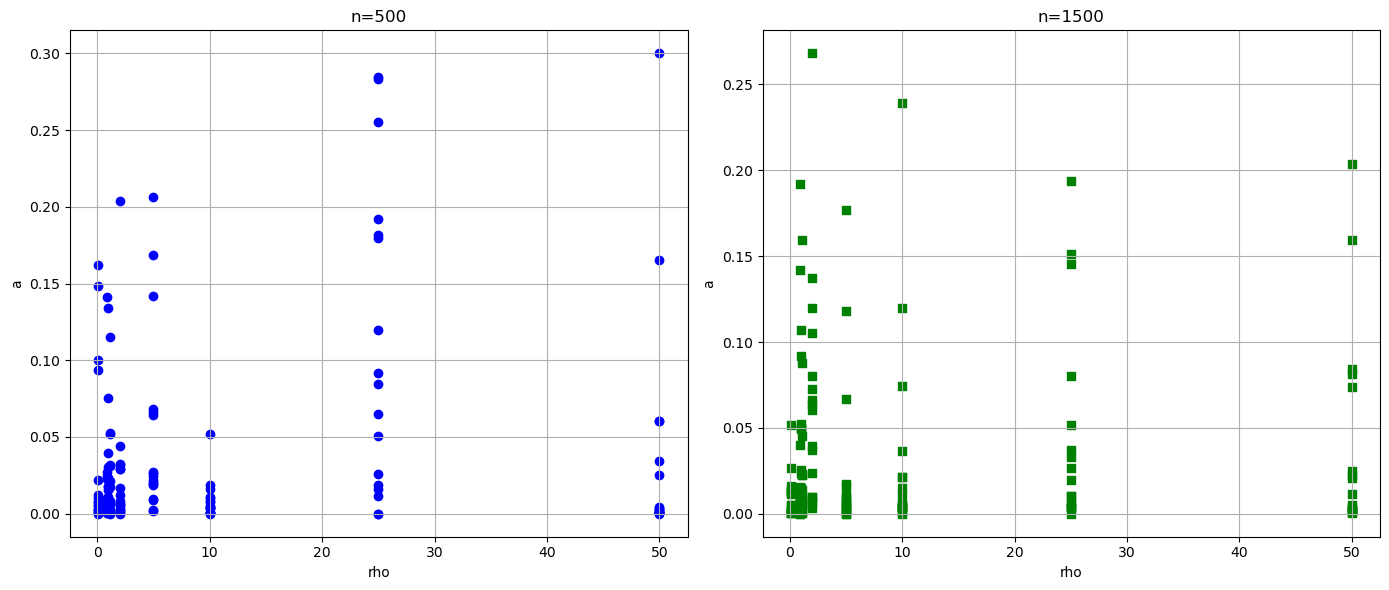

In [5]:
# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scatter Plot 1: rho vs a
ax1.scatter(df1['rho'], df1['a'], color='blue', marker='o')
ax1.set_title('n=500')
ax1.set_xlabel('rho')
ax1.set_ylabel('a')
ax1.grid(True)

# Scatter Plot 2: rho vs a
ax2.scatter(df2['rho'], df2['a'], color='green', marker='s')
ax2.set_title('n=1500')
ax2.set_xlabel('rho')
ax2.set_ylabel('a')
ax2.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

In [10]:
max_a_index = df1['a'].idxmax()

# Retrieve the sample with the largest 'a' value
df1.loc[max_a_index]


rho      50.000000
pthin     0.400000
VPT       1.222667
a         0.300000
g         9.440293
s         1.178128
Name: 150, dtype: float64

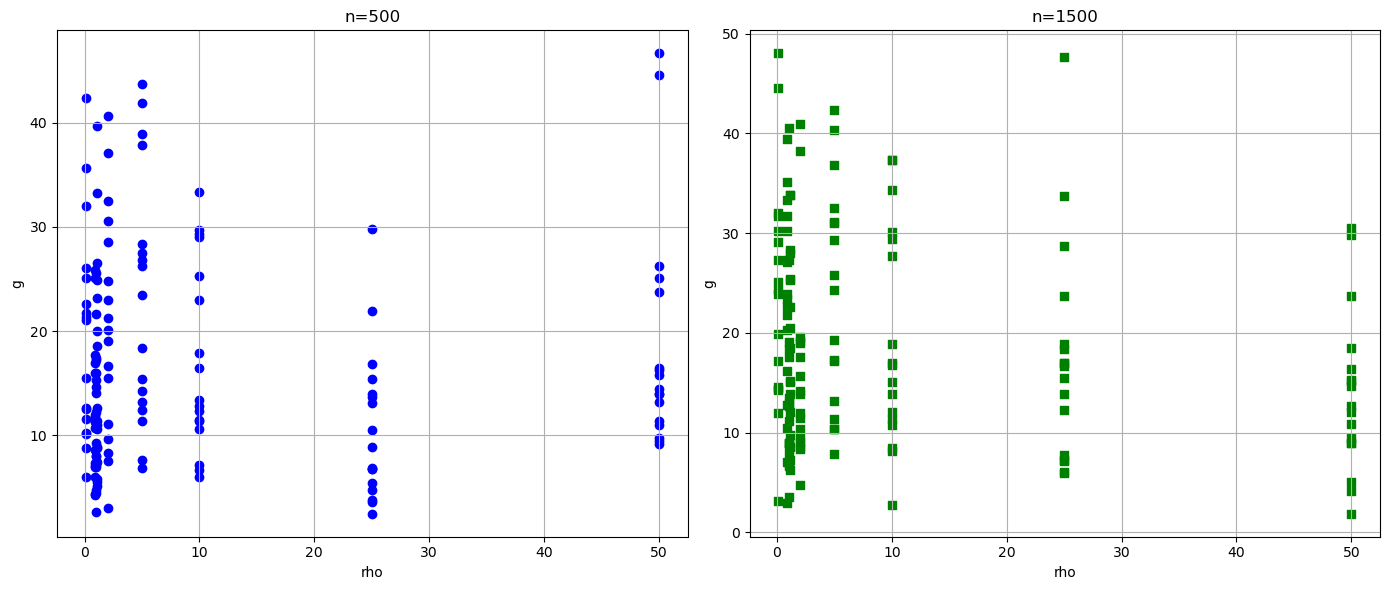

In [11]:
# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scatter Plot 1: rho vs g
ax1.scatter(df1['rho'], df1['g'], color='blue', marker='o')
ax1.set_title('n=500')
ax1.set_xlabel('rho')
ax1.set_ylabel('g')
ax1.grid(True)

# Scatter Plot 2: rho vs g
ax2.scatter(df2['rho'], df2['g'], color='green', marker='s')
ax2.set_title('n=1500')
ax2.set_xlabel('rho')
ax2.set_ylabel('g')
ax2.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

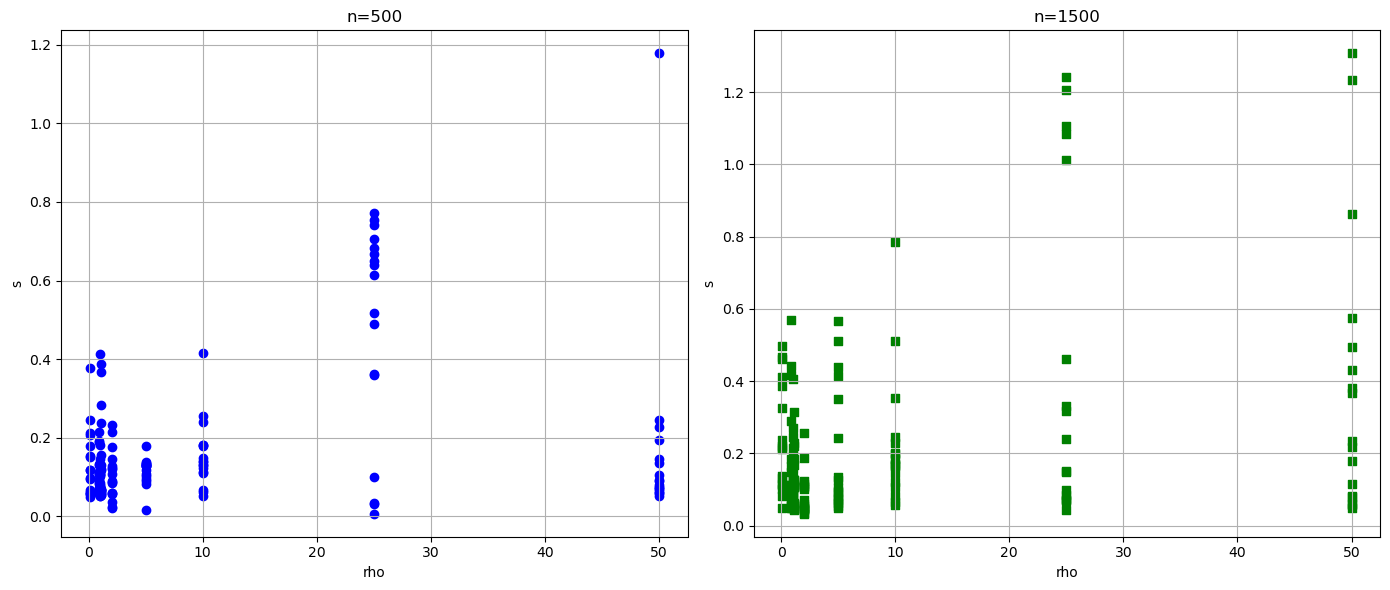

In [12]:
# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scatter Plot 1: rho vs s
ax1.scatter(df1['rho'], df1['s'], color='blue', marker='o')
ax1.set_title('n=500')
ax1.set_xlabel('rho')
ax1.set_ylabel('s')
ax1.grid(True)

# Scatter Plot 2: rho vs s
ax2.scatter(df2['rho'], df2['s'], color='green', marker='s')
ax2.set_title('n=1500')
ax2.set_xlabel('rho')
ax2.set_ylabel('s')
ax2.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

In [13]:
def meshplotit(df, var):
    # Extract unique values for rho and pthin
    rho_values = np.unique(df['rho'])
    pthin_values = np.unique(df['pthin'])

    # Create a mesh grid for plotting
    RHO, PTHIN = np.meshgrid(np.arange(len(rho_values)), np.arange(len(pthin_values)))
    A = np.zeros(RHO.shape)

    # Populate the grid with 'a' values
    for i, rho_val in enumerate(rho_values):
        for j, pthin_val in enumerate(pthin_values):
            var_val = df[(df['rho'] == rho_val) & (df['pthin'] == pthin_val)][var]
            if not var_val.empty:
                A[j, i] = var_val.values[0]

    # Create the plot
    plt.figure(figsize=(5, 5))
    c = plt.pcolormesh(RHO, PTHIN, A, shading='auto', cmap='viridis')

    # Add a color bar
    plt.colorbar(c, label=var)

    # Set x-ticks and y-ticks to be equally spaced
    plt.xticks(ticks=np.arange(len(rho_values)), labels=rho_values)
    plt.yticks(ticks=np.arange(len(pthin_values)), labels=pthin_values)

    # Add labels and title
    plt.xlabel('rho')
    plt.ylabel('pthin')
    plt.title(f'Color Bar Plot of {var} vs rho and pthin')

    # Show the plot
    plt.show()

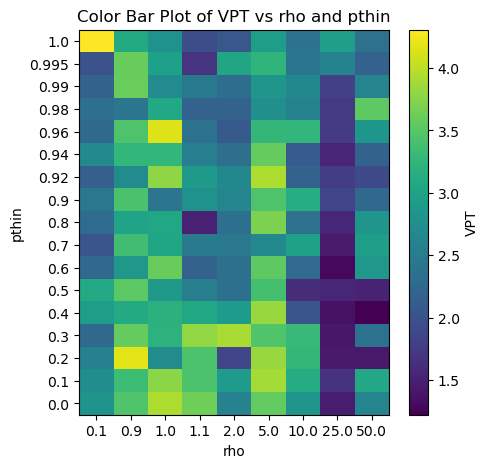

In [14]:
meshplotit(df1, 'VPT')

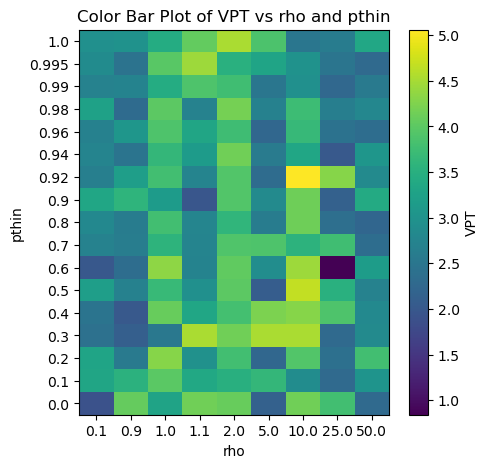

In [15]:
meshplotit(df2, 'VPT')

In [20]:
def pthin_vs(df, rho):  
    rho_constant = rho  # Replace with the desired rho value

    # Filter the DataFrame for the constant rho value
    filtered_df = df[df['rho'] == rho_constant]
    filtered_df_sorted = filtered_df.sort_values(by='pthin')

    bounds = [(1e-8, 0.3), (0.1, 50), (1e-3, 3)]

    # Plotting
    plt.figure(figsize=(15, 5))
    for i, var in enumerate(['a', 'g', 's']):
        plt.subplot(1,3,i+1)
        plt.plot(filtered_df_sorted['pthin'], filtered_df_sorted[var], marker='o', linestyle='-', color='b')

        # Add labels and title
        plt.xlabel('pthin')
        plt.ylabel(var)
        plt.ylim(bounds[i][0], bounds[i][1])
        plt.title(f'Plot of {var} vs pthin for rho = {rho_constant}')

        # Show the plot
        plt.grid(True)
    plt.show()

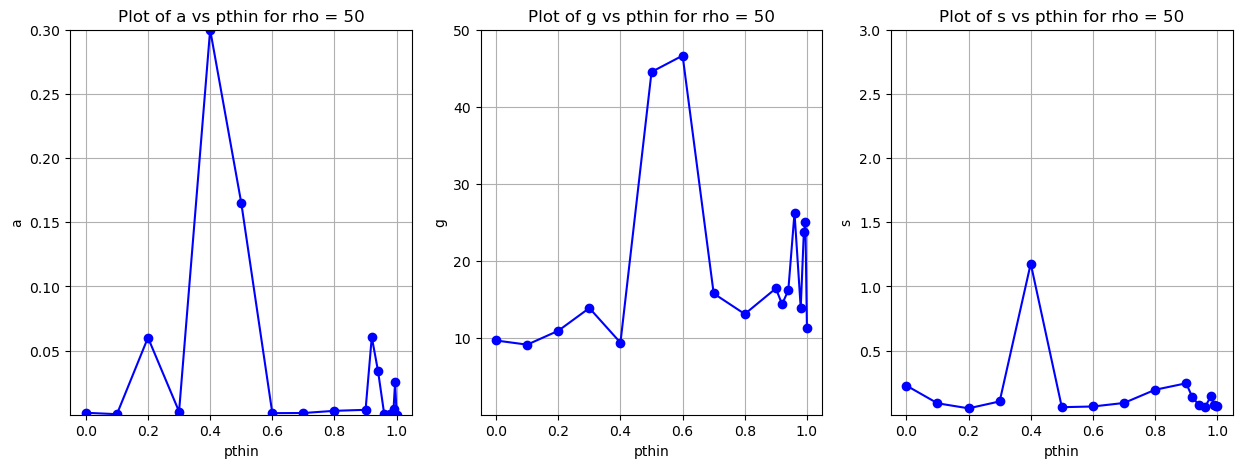

In [21]:
pthin_vs(df1, 50)

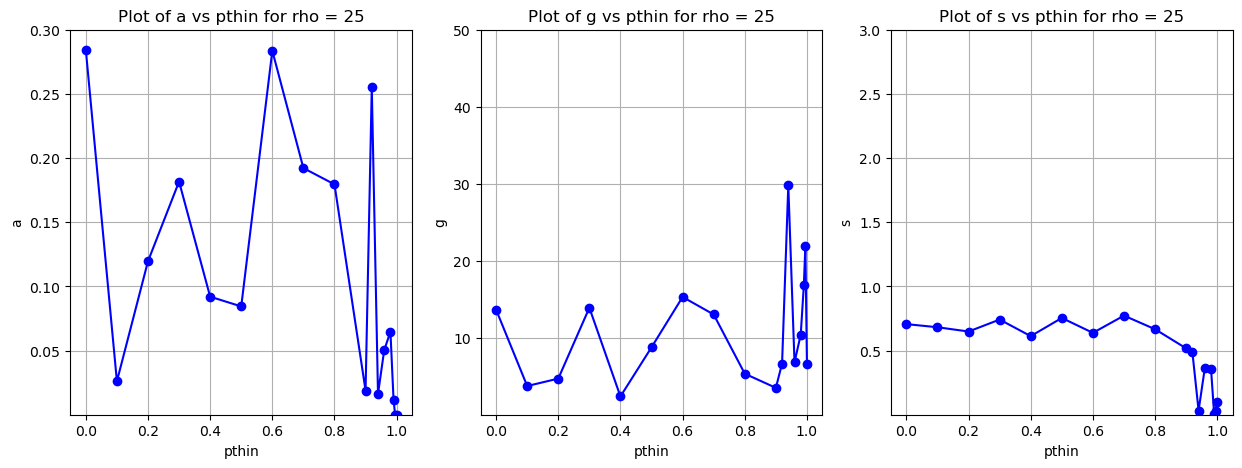

In [22]:
pthin_vs(df1, 25)

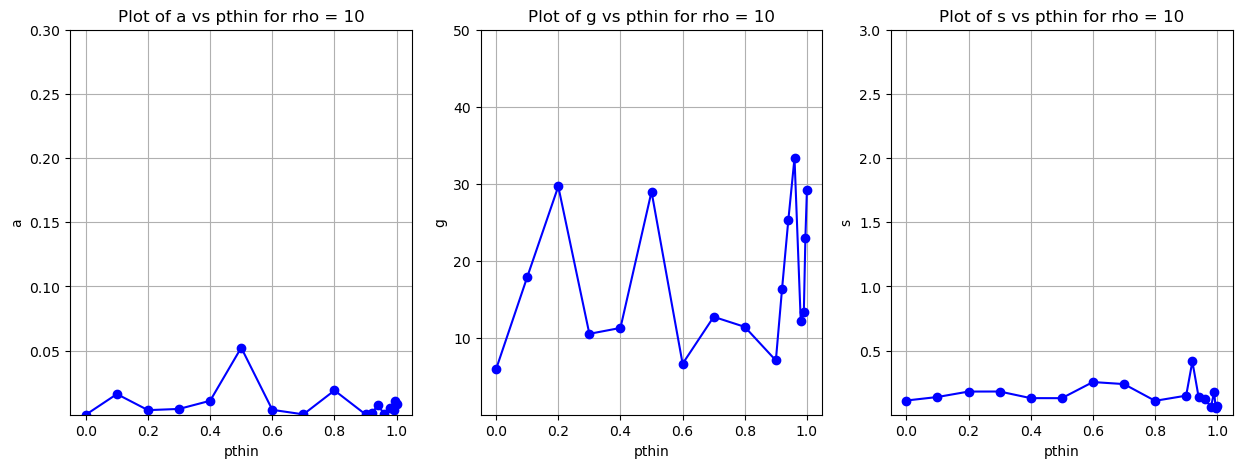

In [23]:
pthin_vs(df1, 10)

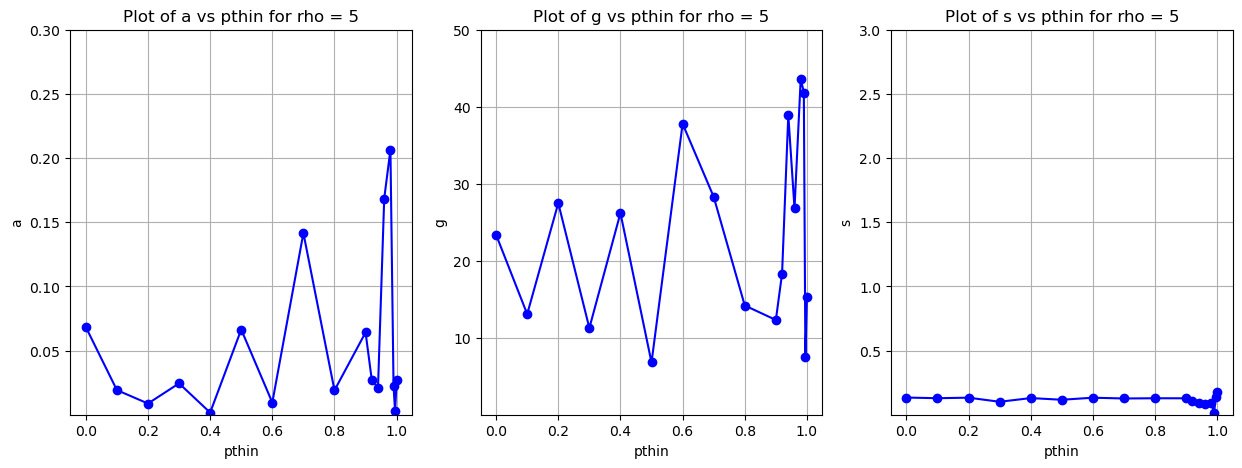

In [25]:
pthin_vs(df1, 5)

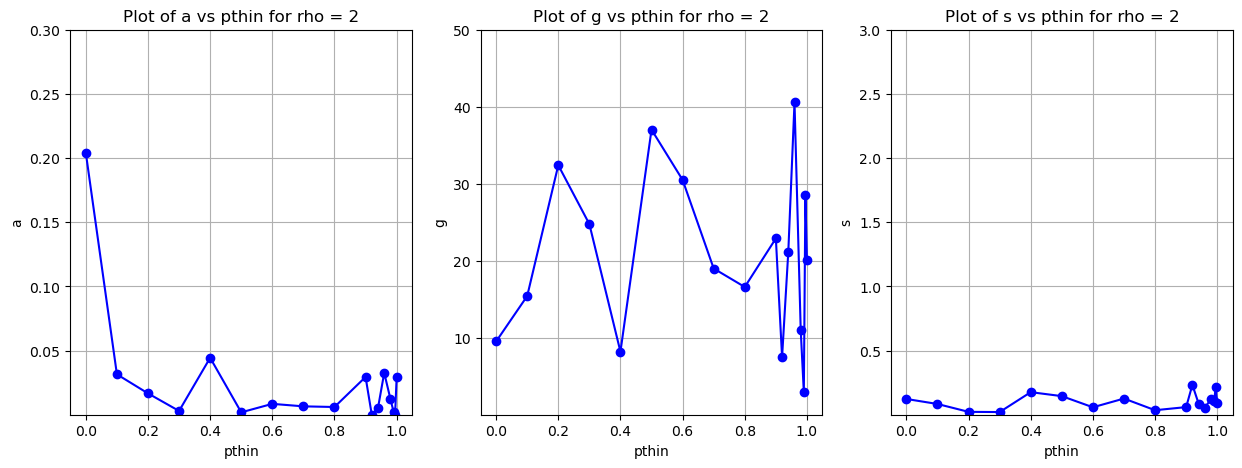

In [26]:
pthin_vs(df1, 2)

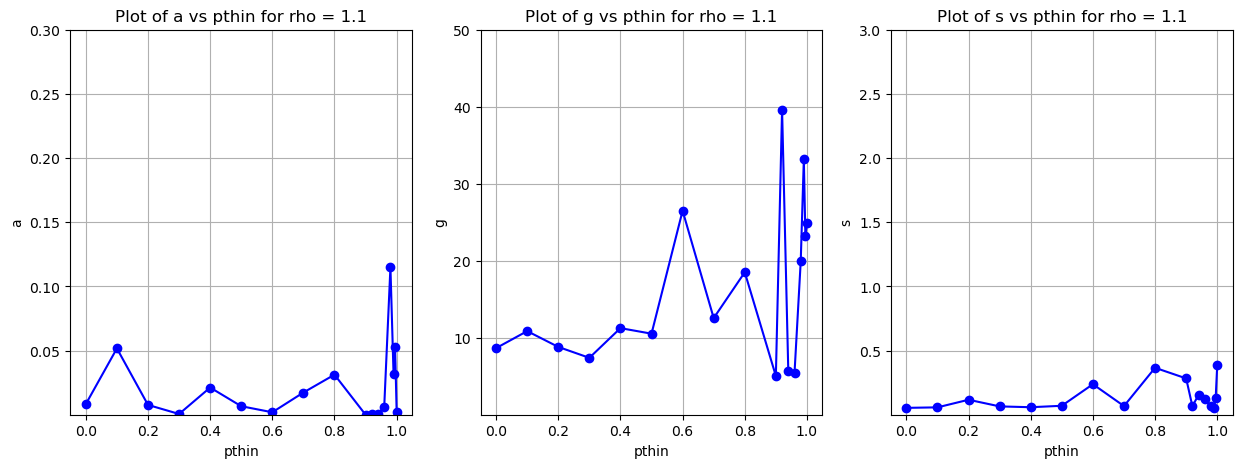

In [27]:
pthin_vs(df1, 1.1)

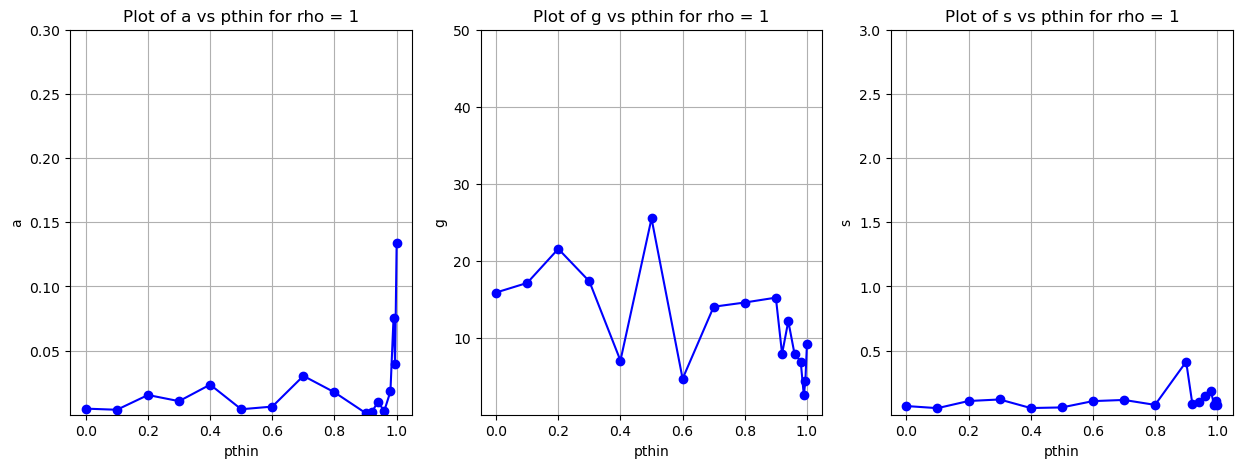

In [28]:
pthin_vs(df1, 1)

In [54]:
def vpt_compare(df, var, title=''):  
    
    plt.figure(figsize=(15, 5))
    for rho in np.unique(df['rho']):

        # Filter the DataFrame for the constant rho value
        filtered_df = df[df['rho'] == rho]
        filtered_df_sorted = filtered_df.sort_values(by='pthin')
        plt.plot(np.arange(len(filtered_df_sorted)), filtered_df_sorted[var], marker='o', linestyle='-', label=str(rho))

    # Add labels and title
    plt.xlabel('pthin')
    plt.ylabel(var)
    plt.xticks(ticks=np.arange(len(filtered_df_sorted)), labels=filtered_df_sorted['pthin'])
    plt.ylim(0, df[var].max()+0.5)
    plt.title(f'Plot of {var} vs pthin for rho = {rho}'+title)
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

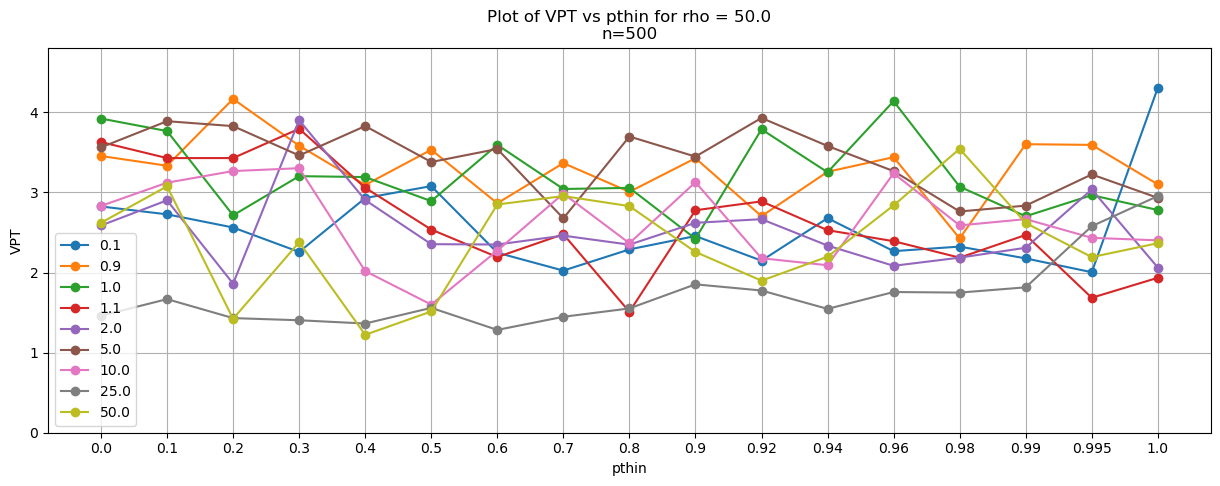

In [55]:
vpt_compare(df1, 'VPT', '\nn=500')

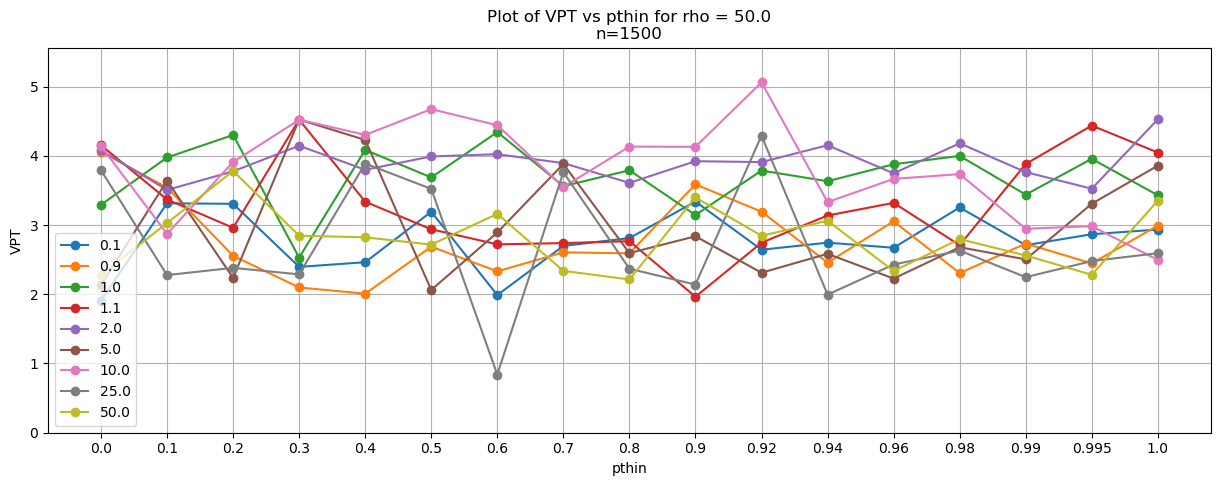

In [56]:
vpt_compare(df2, 'VPT', '\nn=1500')